**1 - Upload the Data :**

In [15]:
# load necessary libraries

library(readr)
library(dplyr)
library(ggplot2)

# import the datasets

sales_data <- read_csv("sales data-set.csv")
stores_data <- read_csv("stores data-set.csv")
features_data <- read_csv("features data-set.csv")

# check first rows of each dataset

head(sales_data)
head(stores_data)
head(features_data)

Rows: 421570 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (3): Store, Dept, Weekly_Sales
lgl (1): IsHoliday

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 45 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Type
dbl (2): Store, Size

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 8190 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Date
dbl (10): Store, Temperature, Fuel_Price, MarkDown1, MarkDown2, MarkDown3, M...
lgl  (1): IsHoliday

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_

Store,Dept,Date,Weekly_Sales,IsHoliday
<dbl>,<dbl>,<chr>,<dbl>,<lgl>
1,1,05/02/2010,24924.50,FALSE
1,1,12/02/2010,46039.49,TRUE
1,1,19/02/2010,41595.55,FALSE
1,1,26/02/2010,19403.54,FALSE
1,1,05/03/2010,21827.90,FALSE
1,1,12/03/2010,21043.39,FALSE


Store,Type,Size
<dbl>,<chr>,<dbl>
1,A,151315
2,A,202307
3,B,37392
4,A,205863
5,B,34875
6,A,202505


Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,05/02/2010,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
1,12/02/2010,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE
1,19/02/2010,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE
1,26/02/2010,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE
1,05/03/2010,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE
1,12/03/2010,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE


In [16]:
# Merging the sales, store, and feature datasets
combined_data <- merge(sales_data, stores_data, by = "Store", all.x = TRUE)
combined_data <- merge(combined_data, features_data, by = c("Store", "Date"), all.x = TRUE)

In [18]:
# Handling missing values in the markdown columns
combined_data$MarkDown1[is.na(combined_data$MarkDown1)] <- 0
combined_data$MarkDown2[is.na(combined_data$MarkDown2)] <- 0

**2 - Data Exploration & Cleaning :**


In [3]:
# Load required libraries
library(tidyverse)

# Load the datasets
sales_data <- read_csv("sales data-set.csv")
stores_data <- read_csv("stores data-set.csv")
features_data <- read_csv("features data-set.csv")

# Convert date columns to Date format
sales_data$Date <- as.Date(sales_data$Date, format = "%d/%m/%Y")
features_data$Date <- as.Date(features_data$Date, format = "%d/%m/%Y")

# Merge sales data with store information
sales_data <- merge(sales_data, stores_data, by = "Store", all.x = TRUE)

# Merge sales data with features (markdowns, temperature, etc.)
sales_data <- merge(sales_data, features_data, by = c("Store", "Date"), all.x = TRUE)

# Check the structure of the merged data
glimpse(sales_data)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 421570 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (3): Store, Dept, Weekly_Sales
lgl (1): IsHoliday

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 45 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Type
dbl (2): Store, Size

ℹ Use `spec()` to retrieve the full column s

Rows: 421,570
Columns: 17
$ Store        <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ Date         <date> 2010-02-05, 2010-02-05, 2010-02-05, 2010-02-05, 2010-02-…
$ Dept         <dbl> 1, 26, 17, 45, 28, 79, 55, 5, 58, 7, 83, 9, 87, 34, 19, 5…
$ Weekly_Sales <dbl> 24924.50, 11737.12, 13223.76, 37.44, 1085.29, 46729.77, 2…
$ IsHoliday.x  <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, F…
$ Type         <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A…
$ Size         <dbl> 151315, 151315, 151315, 151315, 151315, 151315, 151315, 1…
$ Temperature  <dbl> 42.31, 42.31, 42.31, 42.31, 42.31, 42.31, 42.31, 42.31, 4…
$ Fuel_Price   <dbl> 2.572, 2.572, 2.572, 2.572, 2.572, 2.572, 2.572, 2.572, 2…
$ MarkDown1    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ MarkDown2    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ MarkDown3    <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ MarkDown4   

In [4]:
# Convert the 'Date' to date type in sales_data & features_data

sales_data$Date <- as.Date(sales_data$Date, format = "%d /%m /%Y")
features_data$Date <- as.Date(features_data$Date, format = "%d /%m /%Y")

# Check if conversion is done

head(sales_data)
head(features_data)


,Store,Date,Dept,Weekly_Sales,IsHoliday.x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday.y
,<dbl>,<date>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,1,2010-02-05,1,24924.50,FALSE,A,151315,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
2,1,2010-02-05,26,11737.12,FALSE,A,151315,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
3,1,2010-02-05,17,13223.76,FALSE,A,151315,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
4,1,2010-02-05,45,37.44,FALSE,A,151315,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
5,1,2010-02-05,28,1085.29,FALSE,A,151315,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
6,1,2010-02-05,79,46729.77,FALSE,A,151315,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE


Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,2010-02-05,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,FALSE
1,2010-02-12,38.51,2.548,NA,NA,NA,NA,NA,211.2422,8.106,TRUE
1,2010-02-19,39.93,2.514,NA,NA,NA,NA,NA,211.2891,8.106,FALSE
1,2010-02-26,46.63,2.561,NA,NA,NA,NA,NA,211.3196,8.106,FALSE
1,2010-03-05,46.50,2.625,NA,NA,NA,NA,NA,211.3501,8.106,FALSE
1,2010-03-12,57.79,2.667,NA,NA,NA,NA,NA,211.3806,8.106,FALSE


In [5]:
# Check for missing values

colSums(is.na(sales_data))
colSums(is.na(stores_data))
colSums(is.na(features_data))


Store         Date         Dept Weekly_Sales  IsHoliday.x         Type 
           0            0            0            0            0            0 
        Size  Temperature   Fuel_Price    MarkDown1    MarkDown2    MarkDown3 
           0            0            0       270889       310322       284479 
   MarkDown4    MarkDown5          CPI Unemployment  IsHoliday.y 
      286603       270138            0            0            0

Store  Type  Size 
    0     0     0

Store         Date  Temperature   Fuel_Price    MarkDown1    MarkDown2 
           0            0            0            0         4158         5269 
   MarkDown3    MarkDown4    MarkDown5          CPI Unemployment    IsHoliday 
        4577         4726         4140          585          585            0

#**Exploratory Data Analysis and Statistical Testing**



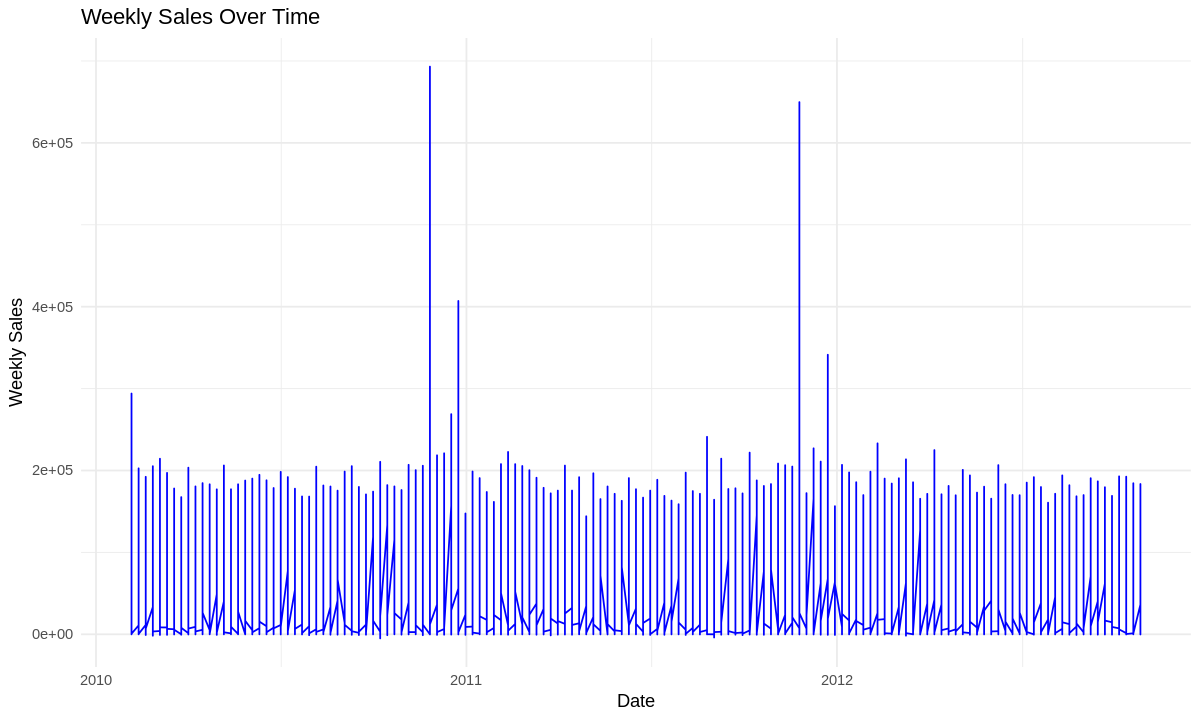

In [6]:
# Adjusting Plot Size (make it bigger)
options(repr.plot.width = 10, repr.plot.height = 6)

# Visualize Sales Trends Over Time

library(ggplot2)

ggplot(sales_data, aes(x = Date, y = Weekly_Sales))+
  geom_line(color = "blue") +
  labs(title = "Weekly Sales Over Time", x = "Date", y = "Weekly Sales")+
  theme_minimal()

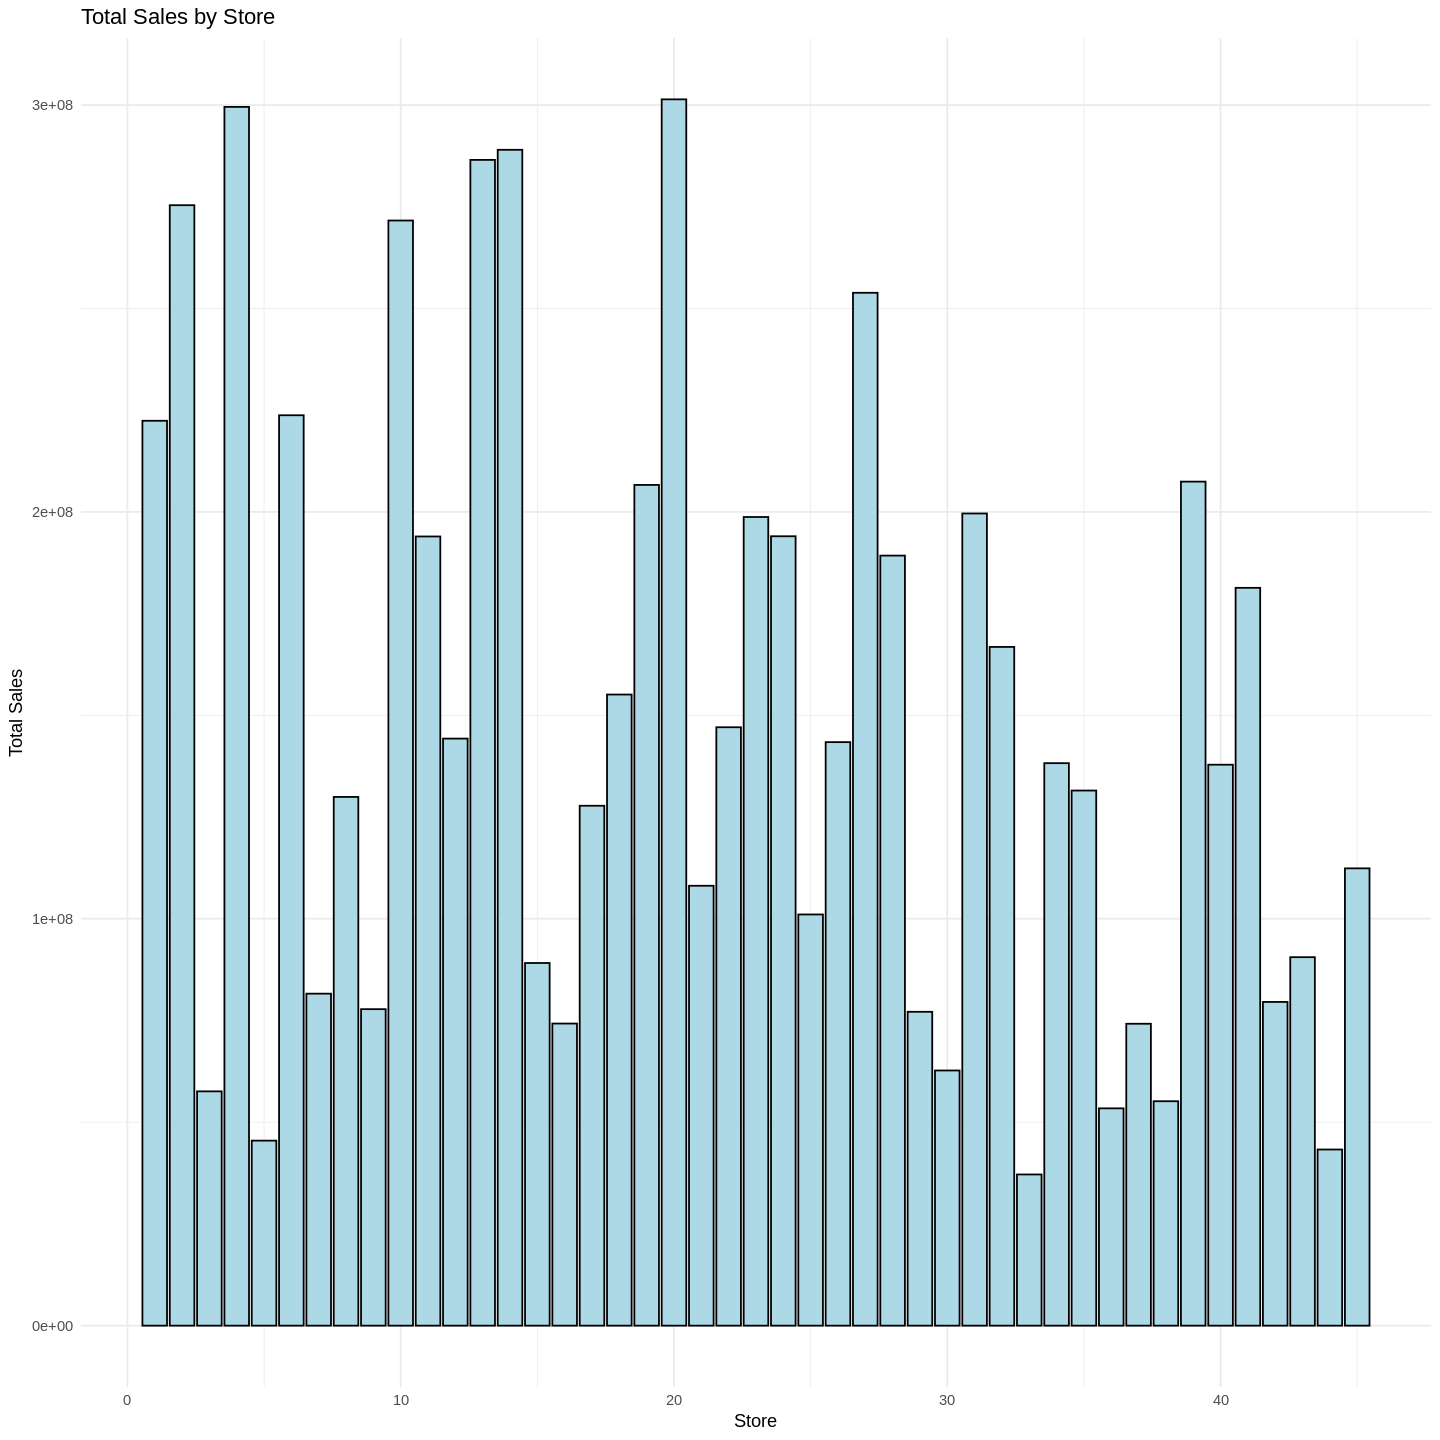

In [7]:
options(repr.plot.width = 12, repr.plot.height = 12)

# Aggregate Sales by Store & Plotting

total_sales_by_store <- sales_data %>%
  group_by(Store) %>%
  summarise(Total_Sales = sum(Weekly_Sales, na.rm = TRUE))

# Bar Plot of Total Sales Per Store

ggplot(total_sales_by_store, aes(x = Store, y = Total_Sales)) +
  geom_bar(stat = "identity", fill = "lightblue", color = "black") +
  labs(title = "Total Sales by Store", x = "Store", y = "Total Sales") +
  theme_minimal()

#**Hypothesis Testing**




In [8]:
  # Hypothesis 1 : SALES ARE HIGHER DURING HOLIDAYS

  # We'll perform a t-test to compare sales during holiday periods with non-holiday periods.
t_test_result <- t.test(Weekly_Sales ~ IsHoliday.x, data = sales_data)
print(t_test_result)



	Welch Two Sample t-test

data:  Weekly_Sales by IsHoliday.x
t = -7.0007, df = 32752, p-value = 2.595e-12
alternative hypothesis: true difference in means between group FALSE and group TRUE is not equal to 0
95 percent confidence interval:
 -1451.9763  -816.7799
sample estimates:
mean in group FALSE  mean in group TRUE 
           15901.45            17035.82 



In [9]:
  # Hypothesis 2 : SALES PERFORMANCE DIFFERS ACROSS STORE TYPES

  # Merge sales_data with store_data to include Store Type

  sales_data <- merge(sales_data, stores_data, by = "Store")

  # Perform ANOVA to check for differences in sales by store type
anova_result <- aov(Weekly_Sales ~ Type.x, data = sales_data)
summary(anova_result)




                Df    Sum Sq   Mean Sq F value Pr(>F)    
Type.x           2 7.725e+12 3.863e+12    7764 <2e-16 ***
Residuals   421567 2.097e+14 4.975e+08                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

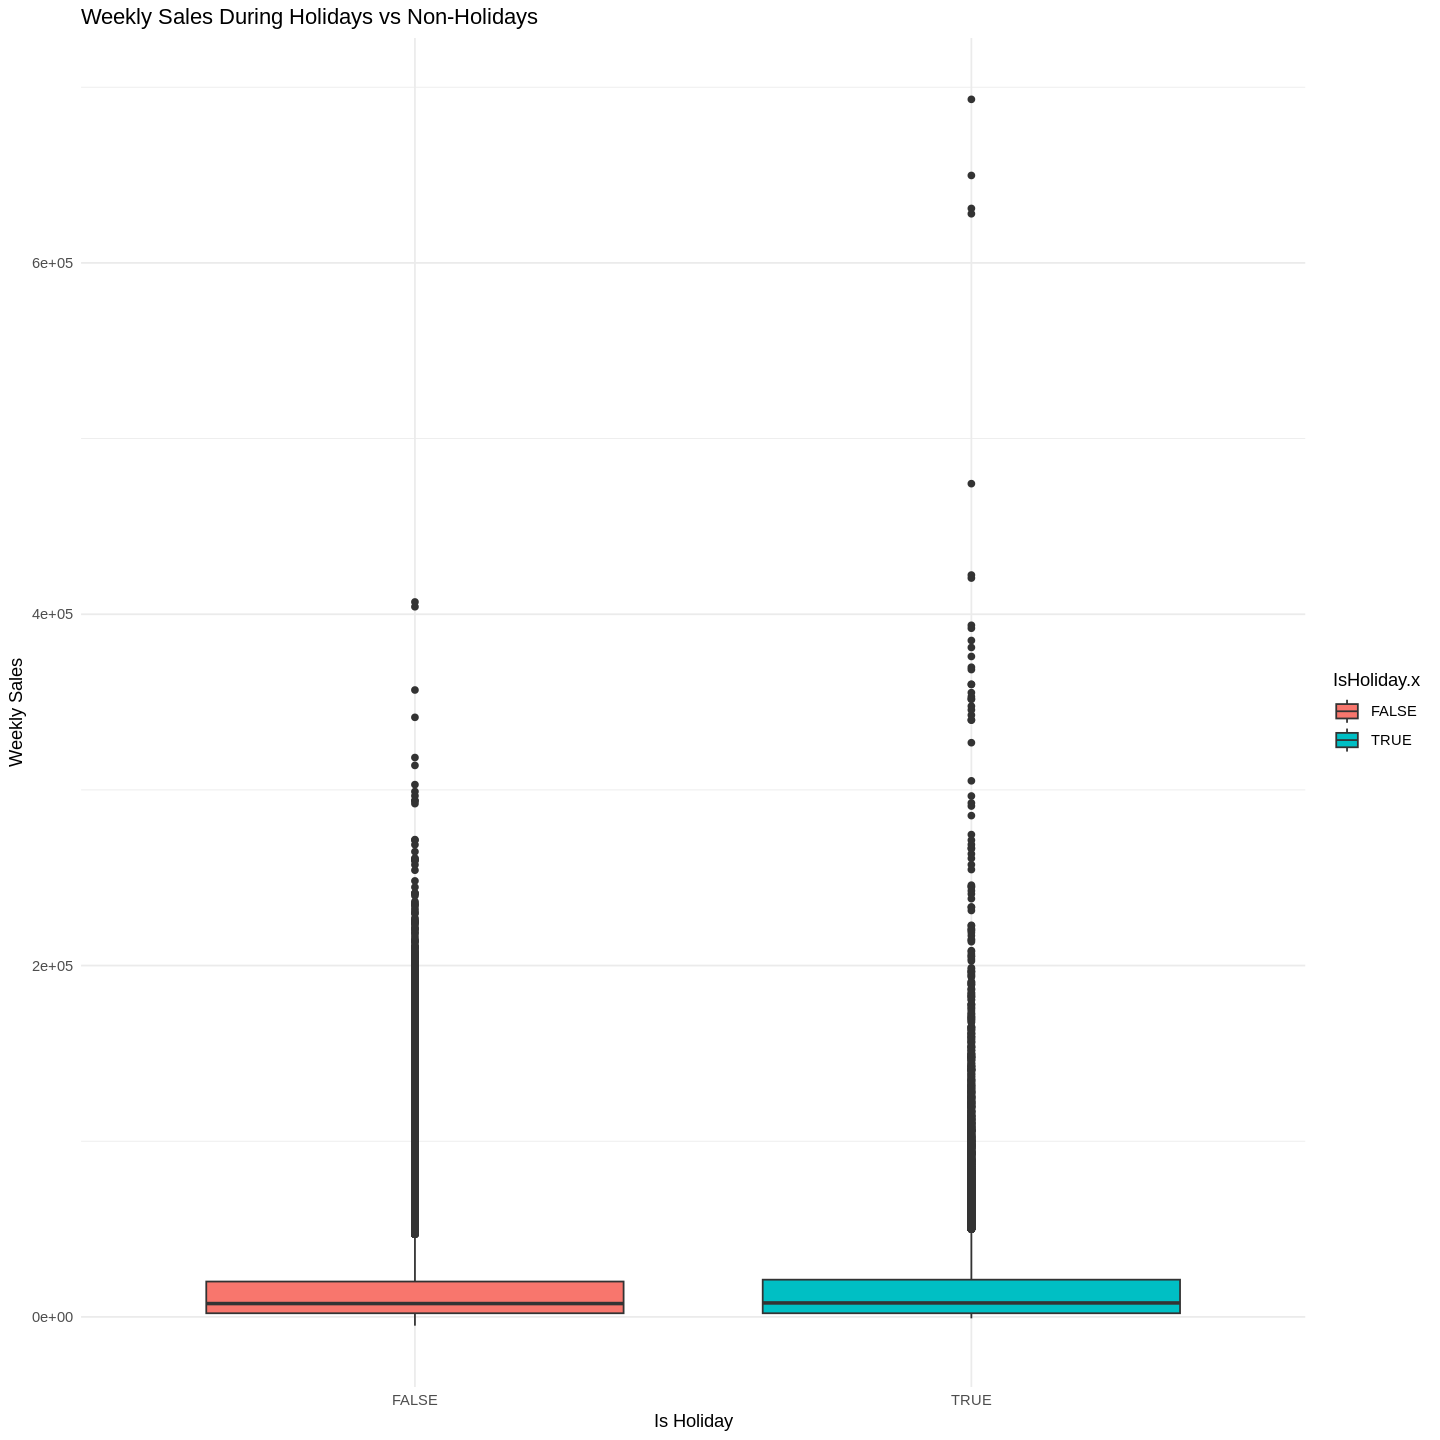

In [10]:
# Boxplot to visualize sales during volidays vs. non-holidays

ggplot(sales_data, aes(x = IsHoliday.x, y = Weekly_Sales, fill = IsHoliday.x)) +
  geom_boxplot() +
  labs(title = "Weekly Sales During Holidays vs Non-Holidays", x = "Is Holiday", y = "Weekly Sales") +
  theme_minimal()

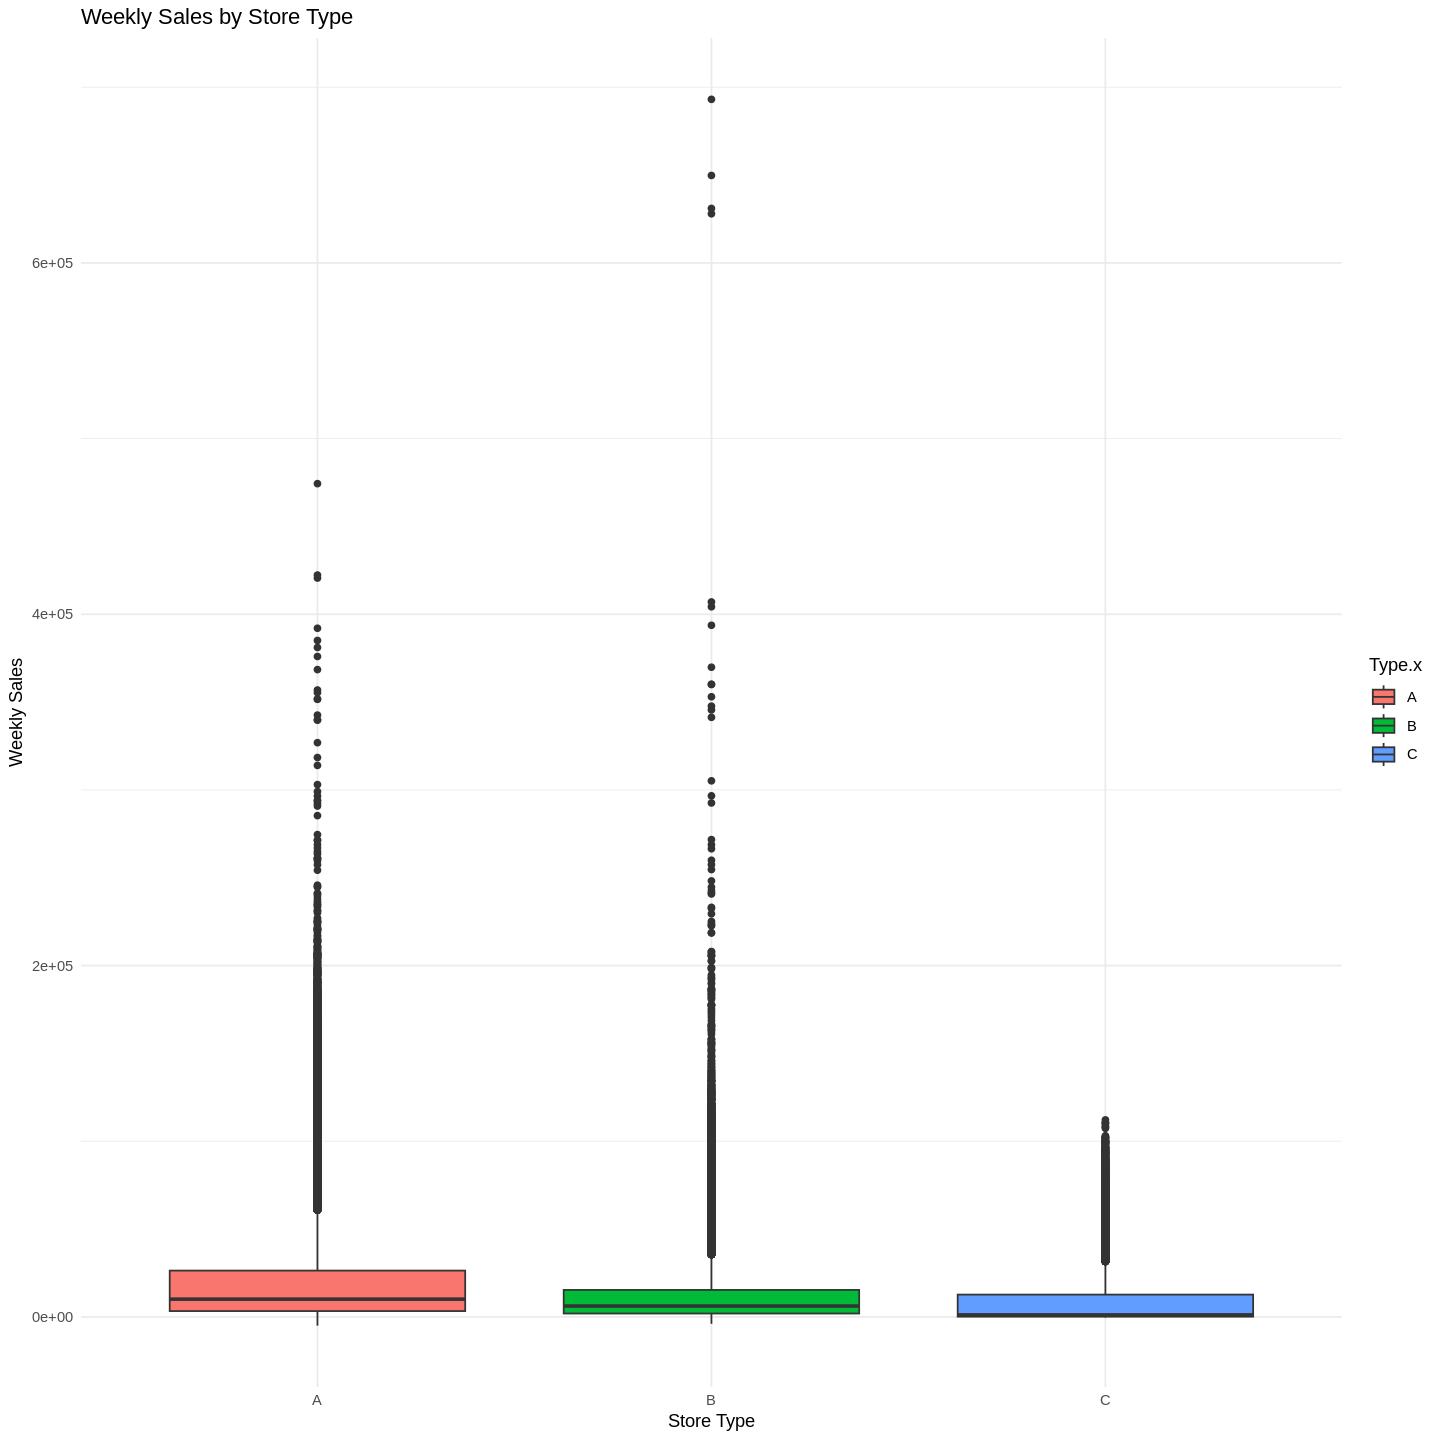

In [11]:
# Boxplot to visualize sales by store type

ggplot(sales_data, aes(x = Type.x, y = Weekly_Sales, fill = Type.x)) +
  geom_boxplot() +
  labs(title = "Weekly Sales by Store Type", x = "Store Type", y = "Weekly Sales") +
  theme_minimal()